In [27]:
import numpy as np 
import pandas as pd 
from statistics import mode 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import re

In [28]:
df = pd.read_csv('diabetes.csv')

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','Age','DiabetesPedigreeFunction']
x = df[feature_cols]
y = df['Outcome']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=1)

In [32]:
rf = RandomForestClassifier(criterion='entropy')

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = [{'n_estimators':[10,20,30,40],'max_depth':[2,3]}]

In [35]:
grid_search = GridSearchCV(estimator=rf,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=-1)

In [36]:
grid_search = grid_search.fit(x_train,y_train)

In [37]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 30}

In [38]:
grid_search.best_score_

0.7467411545623838

In [39]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=30)

In [40]:
rf = grid_search.best_estimator_.fit(x_train,y_train)

In [41]:
y_pred = rf.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       146
           1       0.79      0.48      0.60        85

    accuracy                           0.76       231
   macro avg       0.77      0.70      0.71       231
weighted avg       0.77      0.76      0.75       231

[[135  11]
 [ 44  41]]


In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt 

0.7035052377115231


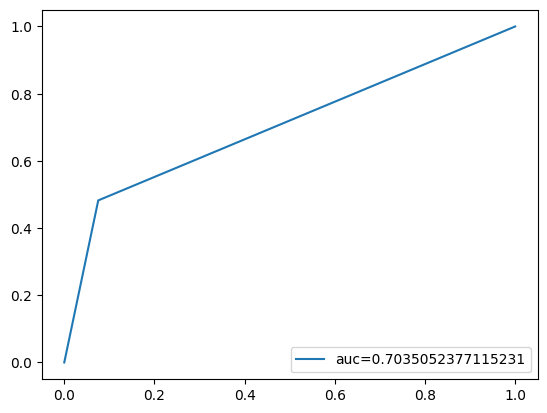

In [47]:
fpr_xg,tpr_xg,thresholds = metrics.roc_curve(y_test,y_pred)
print(metrics.auc(fpr_xg,tpr_xg))
auc_xgb = np.trapz(tpr_xg,fpr_xg)
plt.plot(fpr_xg,tpr_xg,label="auc="+str(auc_xgb))
plt.legend(loc=4)
plt.show()

In [48]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_cols).sort_values(ascending=False)

In [49]:
feature_imp

Glucose                     0.335048
BMI                         0.232306
Age                         0.143511
Pregnancies                 0.103048
DiabetesPedigreeFunction    0.071843
Insulin                     0.067093
BloodPressure               0.047151
dtype: float64

In [50]:
features = feature_cols 
importances = rf.feature_importances_
indices = np.argsort(importances)

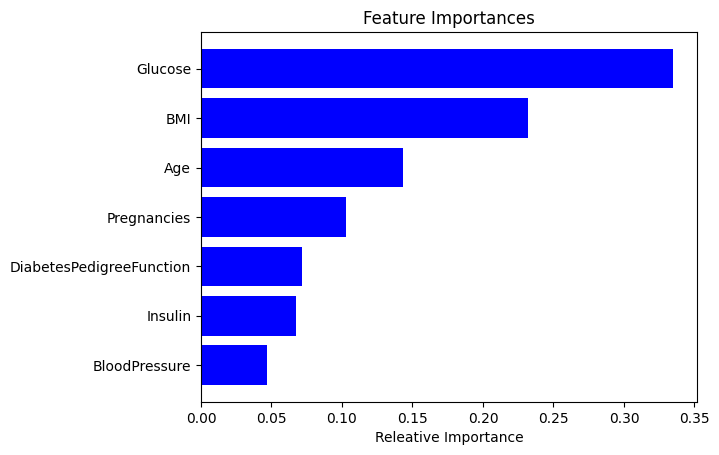

In [51]:
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Releative Importance')
plt.show()